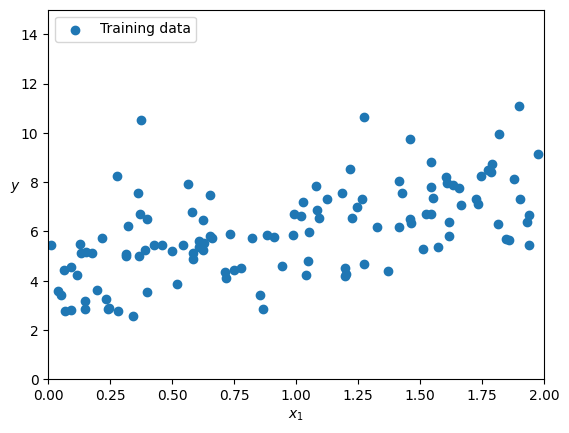

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression as SKLearnLR
import matplotlib.pyplot as plt

from core.linear_regression import SimpleLinearRegression, LinearRegression, LinearRegressionGD
from core.optimizers import BatchGradientDescent, StochasticGradientDescent, MiniBatchGradientDescent, SGDWithSchedule

np.random.seed(42)
X = 2 * np.random.rand(120, 1)
y = 4 + 2 * X.flatten() + np.random.randn(120) * 1.5

plt.scatter(X, y, label="Training data")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([0, 2, 0, 15])
plt.show()


In [3]:
our_model = SimpleLinearRegression()
our_model.fit(X, y)

sklearn_model = SKLearnLR()
sklearn_model.fit(X, y)

print("=== Our Implementation ===")
print(f"Bias (intercept): {our_model.bias_:.6f}")
print(f"Weights (coef):   {our_model.weights_[0]:.6f}")
print(f"R² Score:         {our_model.score(X, y):.6f}")

print("\n=== Sklearn ===")
print(f"Bias (intercept): {sklearn_model.intercept_:.6f}")
print(f"Weights (coef):   {sklearn_model.coef_[0]:.6f}")
print(f"R² Score:         {sklearn_model.score(X, y):.6f}")

=== Our Implementation ===
Bias (intercept): 4.263134
Weights (coef):   1.822696
R² Score:         0.351752

=== Sklearn ===
Bias (intercept): 4.263134
Weights (coef):   1.822696
R² Score:         0.351752


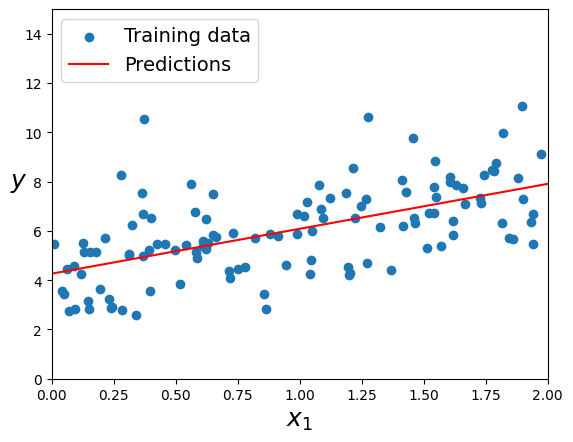

In [4]:
X_new = np.array([[0], [2]])
y_pred = our_model.predict(X_new)

plt.scatter(X, y, label="Training data")
plt.plot(X_new, y_pred, "r-", label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()


In [5]:
np.random.seed(42)
X = np.random.rand(5, 10)  # 5 samples, 10 features
y = np.random.rand(5)

# Add bias column
X_b = np.c_[np.ones((5, 1)), X]

# This will FAIL
try:
    theta_direct = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    print("Direct inverse worked")
except np.linalg.LinAlgError as e:
    print(f"Direct inverse failed: {e}")

# Check why - look at the determinant
print(f"Determinant of X^T X: {np.linalg.det(X_b.T @ X_b)}")

# This will WORK
theta_pseudo = np.linalg.pinv(X_b) @ y
print(f"Pseudoinverse solution: {theta_pseudo[:3]}...")  # First 3 values

Direct inverse worked
Determinant of X^T X: -8.594336516713352e-97
Pseudoinverse solution: [0.26634775 0.35847039 0.02734339]...


Learning rate: 0.0001
Intercept: 0.0633 (true: 4)
Coefficient: 0.0122 (true: 3)
R² Score: -21.0429
Learning rate: 0.001
Intercept: 0.2612 (true: 4)
Coefficient: 0.1043 (true: 3)
R² Score: 0.1646
Learning rate: 0.01
Intercept: 0.2542 (true: 4)
Coefficient: 0.2243 (true: 3)
R² Score: 0.8154
Converged after 311 iterations
Learning rate: 0.1
Intercept: 0.2779 (true: 4)
Coefficient: 0.3299 (true: 3)
R² Score: 0.9927
Learning rate: 1
Intercept: nan (true: 4)
Coefficient: nan (true: 3)
R² Score: nan
Learning rate: 10
Intercept: nan (true: 4)
Coefficient: nan (true: 3)
R² Score: nan


/Users/nanaagyei/Documents/Codes/machine-learning-tutorials/hands-on-ml/venv/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/nanaagyei/Documents/Codes/machine-learning-tutorials/hands-on-ml/linear_regression/core/optimizers.py:70: RuntimeWarning: overflow encountered in square
  cost = (1/(2 * n_samples)) * np.sum(error ** 2)
/Users/nanaagyei/Documents/Codes/machine-learning-tutorials/hands-on-ml/linear_regression/core/optimizers.py:76: RuntimeWarning: invalid value encountered in scalar subtract
  improvement = abs(self.cost_history[-1] - self.cost_history[-2])
/Users/nanaagyei/Documents/Codes/machine-learning-tutorials/hands-on-ml/linear_regression/core/optimizers.py:67: RuntimeWarning: invalid value encountered in subtract
  theta = theta - self.learning_rate * gradient


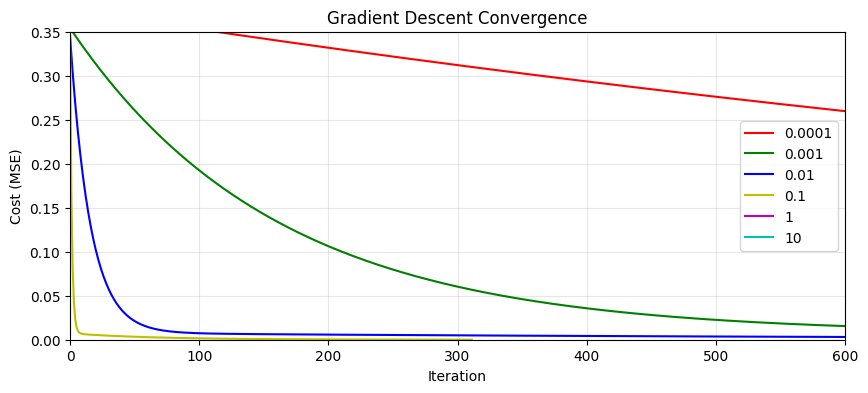

In [6]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 10]
models = []
colors = ['r', 'g', 'b', 'y', 'm', 'c']

for lr in learning_rates:
    model_gd = LinearRegressionGD(learning_rate=lr, n_iterations=1000)
    model_gd.fit(X, y)
    models.append(model_gd)

    print(f"Learning rate: {lr}")
    print(f"Intercept: {model_gd.intercept_:.4f} (true: 4)")
    print(f"Coefficient: {model_gd.coef_[0]:.4f} (true: 3)")
    print(f"R² Score: {model_gd.score(X, y):.4f}")

# model_gd = LinearRegressionGD(learning_rate=1, n_iterations=1000)
# model_gd.fit(X, y)

# print(f"Learning rate: {0.1}")
# print(f"Intercept: {model_gd.intercept_:.4f} (true: 4)")
# print(f"Coefficient: {model_gd.coef_[0]:.4f} (true: 3)")
# print(f"R² Score: {model_gd.score(X, y):.4f}")
    # Plot cost over iterations
plt.figure(figsize=(10, 4))
plt.axis([0, 600, 0, 0.35])
plt.plot(models[0].cost_history_, color=colors[0])
plt.plot(models[1].cost_history_, color=colors[1])
plt.plot(models[2].cost_history_, color=colors[2])
plt.plot(models[3].cost_history_, color=colors[3])
plt.plot(models[4].cost_history_, color=colors[4])
plt.plot(models[5].cost_history_, color=colors[5])
plt.legend(learning_rates)
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')

plt.grid(True, alpha=0.3)
plt.show()

Converged after 244 iterations
Converged after 57 iterations


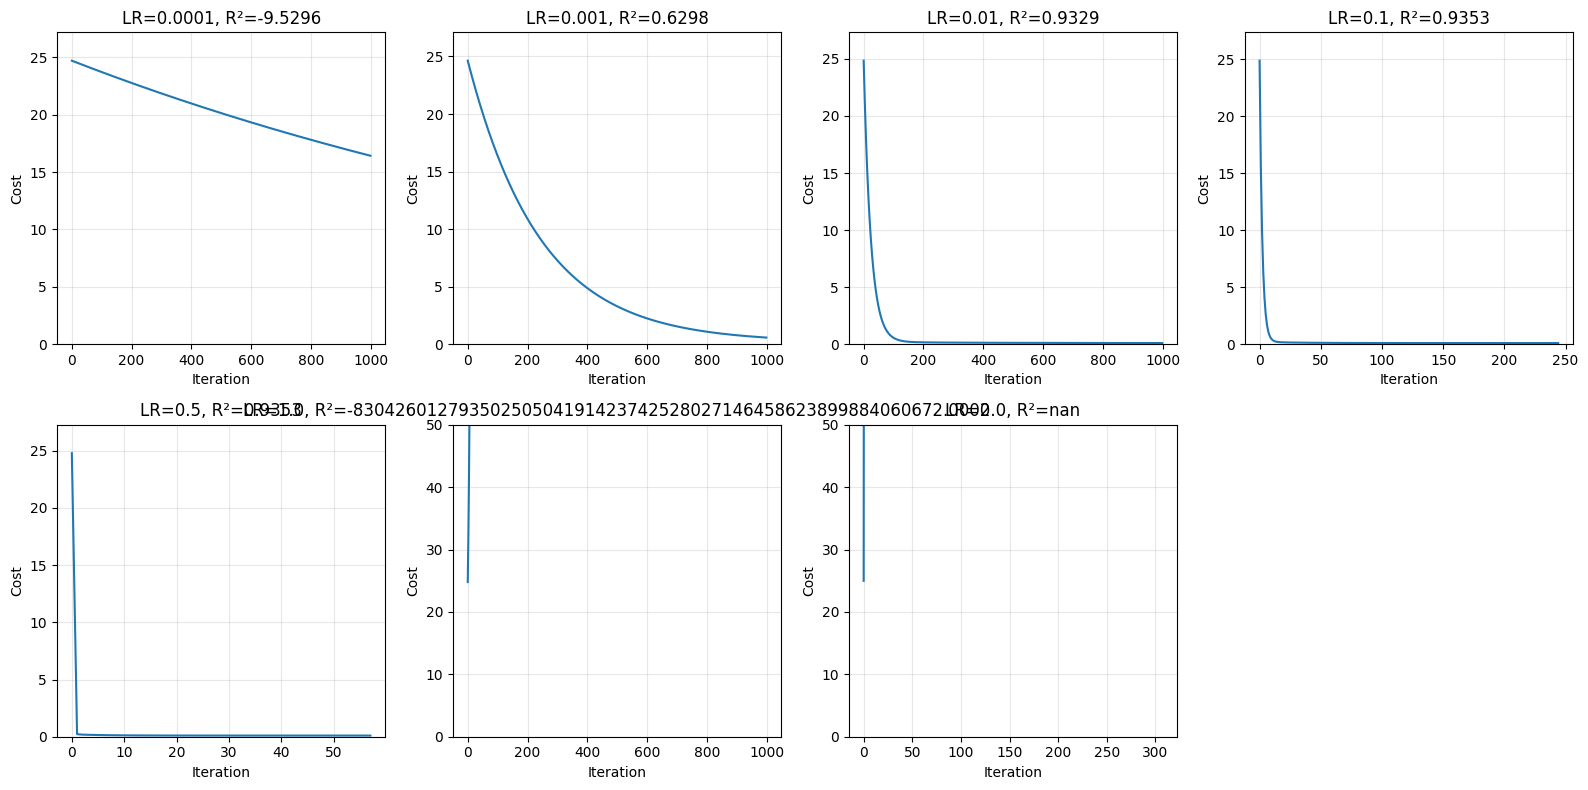


Learning Rate   R² Score        Final Cost     
0.0001          -9.5296         16.4261         BAD
0.001           0.6298          0.5789          slow
0.01            0.9329          0.1047          ✓
0.1             0.9353          0.1009          ✓
0.5             0.9353          0.1008          ✓
1.0             -83042601279350250504191423742528027146458623899884060672.0000 114162934940558600494618344136172204092212918180527472640.0000 BAD
2.0             nan             nan             BAD


In [7]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100) * 0.5

# Test different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
results = []

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for idx, lr in enumerate(learning_rates):
    model = LinearRegressionGD(learning_rate=lr, n_iterations=1000)
    model.fit(X, y)
    r2 = model.score(X, y)
    results.append((lr, r2, model.cost_history_))
    
    # Plot convergence
    if idx < len(axes):
        ax = axes[idx]
        ax.plot(model.cost_history_)
        ax.set_title(f'LR={lr}, R²={r2:.4f}')
        ax.set_xlabel('Iteration')
        ax.set_ylabel('Cost')
        ax.set_ylim([0, min(50, max(model.cost_history_) * 1.1)])  # Cap y-axis
        ax.grid(True, alpha=0.3)

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.show()

# Print summary
print("\n" + "="*50)
print(f"{'Learning Rate':<15} {'R² Score':<15} {'Final Cost':<15}")
print("="*50)
for lr, r2, cost_hist in results:
    final_cost = cost_hist[-1] if cost_hist else float('inf')
    status = "✓" if 0.8 < r2 <= 1.0 else "slow" if 0 < r2 <= 0.8 else "BAD"
    print(f"{lr:<15} {r2:<15.4f} {final_cost:<15.4f} {status}")


Converged after 149 iterations
Converged after 106 iterations
Converged after 75 iterations
Converged after 54 iterations
Converged after 38 iterations
LR=1.124181: Cost increasing, stopping search

Best learning rate: 0.7741


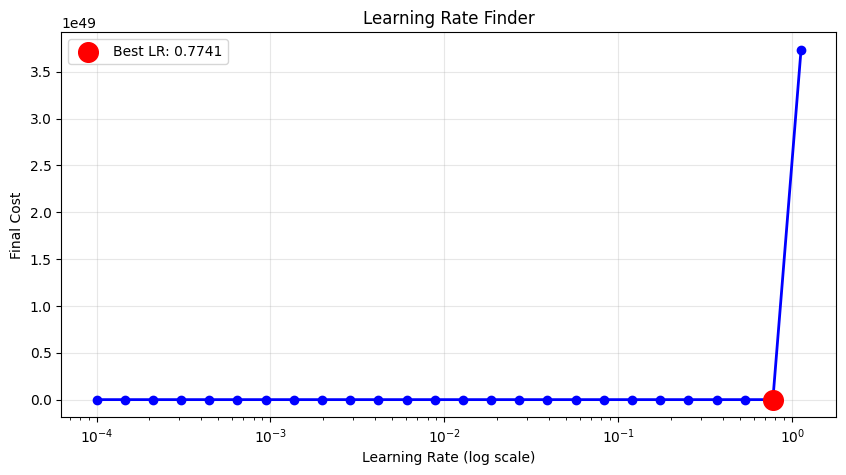

In [8]:
def find_learning_rate(X, y, model, lr_min=1e-5, lr_max=10, n_steps=50):
    """
    Find a good learning rate by testing a logarithmic range.
    
    Strategy: Increase LR until cost starts rising or explodes.
    The best LR is typically ~1 order of magnitude below the explosion point.
    
    Parameters:
        X (ndarray): Training data, shape (n_samples, n_features)
        y (ndarray): Target values, shape (n_samples,)
        model (object): Model with learning_rate attribute and fit method
        lr_min (float): Minimum learning rate to try
        lr_max (float): Maximum learning rate to try
        n_steps (int): Number of learning rates to test
        
    Returns:
        best_lr (float): Recommended learning rate
        learning_rates (ndarray): All tested learning rates
        costs (list): Final cost for each learning rate
    """
    learning_rates = np.geomspace(lr_min, lr_max, n_steps)
    costs = []
    tested_lrs = []
    
    for lr in learning_rates:
        model.learning_rate = lr
        model.fit(X, y)
        
        final_cost = model.cost_history_[-1]
        
        # Check for numerical instability
        if np.isnan(final_cost) or np.isinf(final_cost):
            print(f"LR={lr:.6f}: Cost exploded (NaN/Inf), stopping search")
            break
        
        costs.append(final_cost)
        tested_lrs.append(lr)
        
        # Stop if cost is increasing (LR too high)
        if len(costs) > 1 and costs[-1] > costs[-2]:
            print(f"LR={lr:.6f}: Cost increasing, stopping search")
            break
    
    # Best LR: the one with lowest cost
    # Or more conservatively: one step before cost started rising
    best_idx = np.argmin(costs)
    best_lr = tested_lrs[best_idx]
    
    return best_lr, np.array(tested_lrs), costs


def plot_lr_finder(learning_rates, costs):
    """Visualize the learning rate finder results."""
    plt.figure(figsize=(10, 5))
    plt.semilogx(learning_rates, costs, 'b-o', linewidth=2, markersize=6)
    
    # Mark the best
    best_idx = np.argmin(costs)
    plt.scatter([learning_rates[best_idx]], [costs[best_idx]], 
                color='red', s=200, zorder=5, label=f'Best LR: {learning_rates[best_idx]:.4f}')
    
    plt.xlabel('Learning Rate (log scale)')
    plt.ylabel('Final Cost')
    plt.title('Learning Rate Finder')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

import numpy as np

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X.flatten() + np.random.randn(100) * 0.5

model = LinearRegressionGD(n_iterations=200)
best_lr, lrs, costs = find_learning_rate(X, y, model, lr_min=1e-4, lr_max=5, n_steps=30)

print(f"\nBest learning rate: {best_lr:.4f}")
plot_lr_finder(lrs, costs)

Method               Intercept    Slope        Final Cost  
True values          4.0          3.0          -           
Batch GD             3.9065       3.1164       0.1265      
SGD                  4.1049       2.9303       0.1221      
Mini-batch GD        4.0934       2.9441       0.1220      


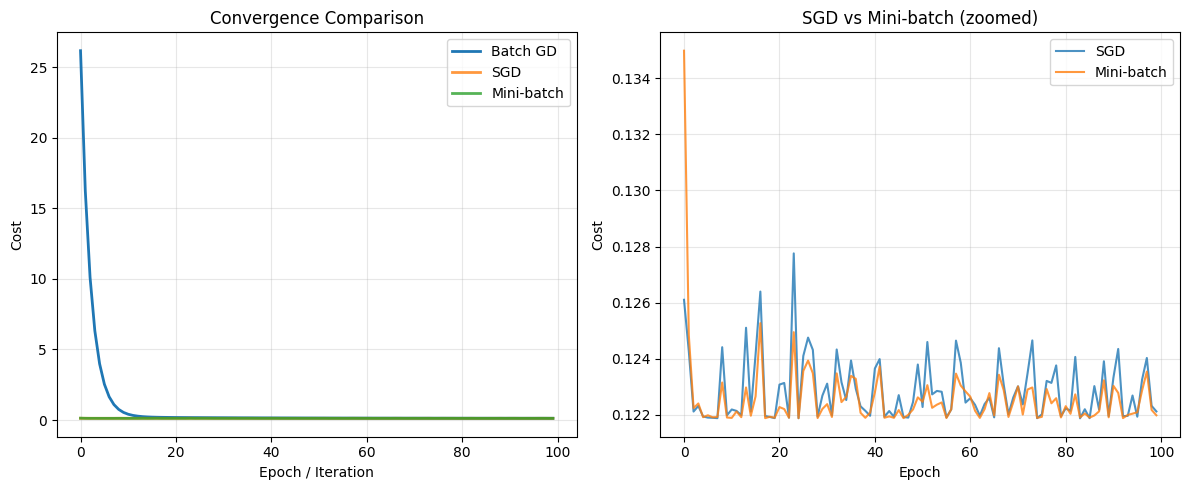

In [9]:
np.random.seed(42)
X = 2 * np.random.rand(1000, 1)
y = 4 + 3 * X.flatten() + np.random.randn(1000) * 0.5

X_b = np.c_[np.ones(len(X)), X]

batch_gd = BatchGradientDescent(learning_rate=0.1, n_iterations=100)
sgd = StochasticGradientDescent(learning_rate=0.01, n_epochs=100, random_state=42)
mini_batch = MiniBatchGradientDescent(learning_rate=0.05, n_epochs=100, 
                                       batch_size=8, random_state=42)

# Run all
theta_batch = batch_gd.optimize(X_b, y)
theta_sgd = sgd.optimize(X_b, y)
theta_mini = mini_batch.optimize(X_b, y)

# Results
print("="*60)
print(f"{'Method':<20} {'Intercept':<12} {'Slope':<12} {'Final Cost':<12}")
print("="*60)
print(f"{'True values':<20} {'4.0':<12} {'3.0':<12} {'-':<12}")
print(f"{'Batch GD':<20} {theta_batch[0]:<12.4f} {theta_batch[1]:<12.4f} {batch_gd.cost_history[-1]:<12.4f}")
print(f"{'SGD':<20} {theta_sgd[0]:<12.4f} {theta_sgd[1]:<12.4f} {sgd.cost_history[-1]:<12.4f}")
print(f"{'Mini-batch GD':<20} {theta_mini[0]:<12.4f} {theta_mini[1]:<12.4f} {mini_batch.cost_history[-1]:<12.4f}")

# Plot convergence
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(batch_gd.cost_history, label='Batch GD', linewidth=2)
plt.plot(sgd.cost_history, label='SGD', linewidth=2, alpha=0.8)
plt.plot(mini_batch.cost_history, label='Mini-batch', linewidth=2, alpha=0.8)
plt.xlabel('Epoch / Iteration')
plt.ylabel('Cost')
plt.title('Convergence Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(sgd.cost_history, label='SGD', alpha=0.8)
plt.plot(mini_batch.cost_history, label='Mini-batch', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('SGD vs Mini-batch (zoomed)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()











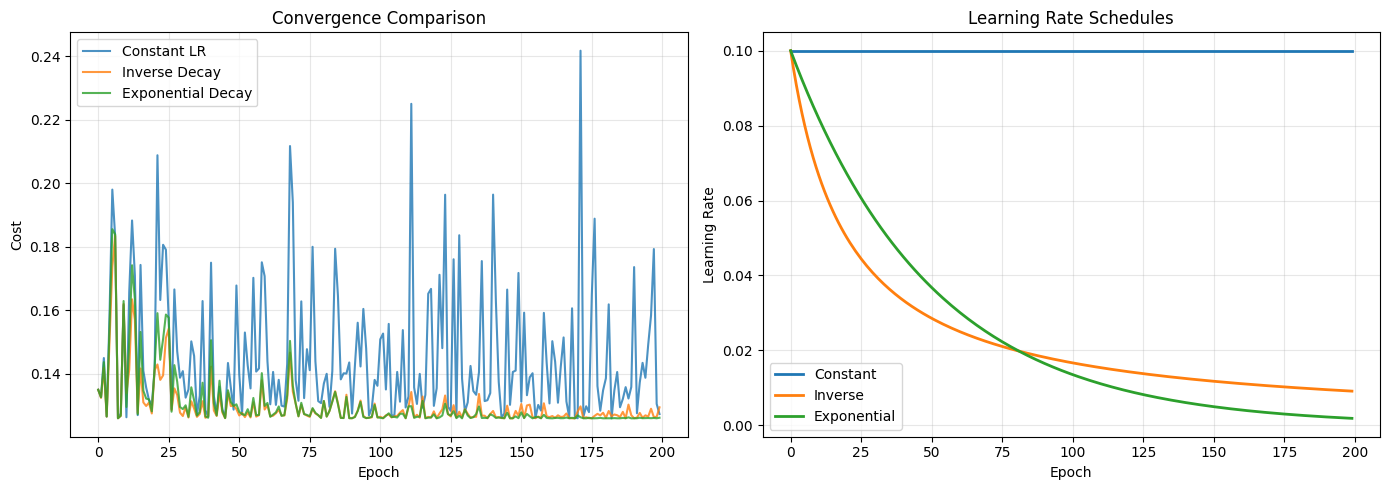


Schedule        Intercept    Slope        Final Cost  
True            4.0          3.0         
Constant        3.9602       3.0031       0.127281    
Inverse         3.9229       3.0040       0.129396    
Exponential     3.9394       3.0463       0.126118    


In [13]:
np.random.seed(42)
X = 2 * np.random.rand(500, 1)
y = 4 + 3 * X.flatten() + np.random.randn(500) * 0.5
X_b = np.c_[np.ones(len(X)), X]

# Constant LR
sgd_constant = SGDWithSchedule(
    learning_rate=0.1, 
    n_epochs=200, 
    schedule='constant',
    random_state=42
)

# Inverse decay
sgd_inverse = SGDWithSchedule(
    learning_rate=0.1, 
    n_epochs=200, 
    schedule='inverse',
    decay_rate=0.05,
    random_state=42
)

# Exponential decay
sgd_exp = SGDWithSchedule(
    learning_rate=0.1, 
    n_epochs=200, 
    schedule='exponential',
    decay_rate=0.02,
    random_state=42
)

theta_const = sgd_constant.optimize(X_b, y)
theta_inv = sgd_inverse.optimize(X_b, y)
theta_exp = sgd_exp.optimize(X_b, y)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cost history
axes[0].plot(sgd_constant.cost_history, label='Constant LR', alpha=0.8)
axes[0].plot(sgd_inverse.cost_history, label='Inverse Decay', alpha=0.8)
axes[0].plot(sgd_exp.cost_history, label='Exponential Decay', alpha=0.8)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Cost')
axes[0].set_title('Convergence Comparison')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Learning rate over time
axes[1].plot(sgd_constant.learning_rate_history, label='Constant', linewidth=2)
axes[1].plot(sgd_inverse.learning_rate_history, label='Inverse', linewidth=2)
axes[1].plot(sgd_exp.learning_rate_history, label='Exponential', linewidth=2)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Learning Rate')
axes[1].set_title('Learning Rate Schedules')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final comparison
print("\n" + "="*60)
print(f"{'Schedule':<15} {'Intercept':<12} {'Slope':<12} {'Final Cost':<12}")
print("="*60)
print(f"{'True':<15} {'4.0':<12} {'3.0':<12}")
print(f"{'Constant':<15} {theta_const[0]:<12.4f} {theta_const[1]:<12.4f} {sgd_constant.cost_history[-1]:<12.6f}")
print(f"{'Inverse':<15} {theta_inv[0]:<12.4f} {theta_inv[1]:<12.4f} {sgd_inverse.cost_history[-1]:<12.6f}")
print(f"{'Exponential':<15} {theta_exp[0]:<12.4f} {theta_exp[1]:<12.4f} {sgd_exp.cost_history[-1]:<12.6f}")